In [1]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.6 MB/s eta 0:00:00


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf
import re
import numpy as np

In [4]:
df=pd.read_json('Dataset for Detection of Cyber-Trolls.json',lines=True)

In [5]:
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [6]:
df.drop('extras',axis=1,inplace=True)

In [7]:
df.head()

,content,annotation
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}"
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}"
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}"
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}"
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}"


In [8]:
df.rename(columns={'annotation': 'label'},inplace=True)

In [9]:
df.head()

,content,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}"
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}"
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}"
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}"
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}"


In [10]:
type({'notes': '', 'label': ['1']})

dict

In [11]:
df['label'] = df['label'].apply(lambda x: int(x['label'][0]))

In [12]:
df.head()

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


In [13]:
df.tail()

,content,label
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0
20000,Who is the biggest gossiper you know?,0


In [14]:
df.isna().sum()

content    0
label      0
dtype: int64

In [15]:
total_Trolls=df['label'].sum()

In [16]:
total_Trolls

7822

In [17]:
df.shape

(20001, 2)

In [18]:
no_trolls=20001-7822

In [19]:
import re
import nltk

In [20]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|www\\S+'
def remove_urls(text):
    return re.sub(url_pattern, '', text)


In [21]:
df['content']=df['content'].apply(remove_urls)

In [22]:
X=list(df['content'])

In [23]:
y=list(df['label'])

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [25]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [26]:
X_train_encoded = tokenizer(X_train, truncation=True, padding=True)
X_test_encoded = tokenizer(X_test, truncation=True, padding=True)

In [27]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(X_train_encoded), y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(X_test_encoded), y_test))

In [28]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-6),
    metrics=['accuracy']  )

In [29]:
history = model.fit(
    train_dataset.batch(8),
    validation_data=test_dataset.batch(16),
    epochs=3,
    verbose=1
)

Epoch 1/3
2000/2000 [==============================] - 805s 390ms/step - loss: 0.5524 - accuracy: 0.6961 - val_loss: 0.4850 - val_accuracy: 0.7438
Epoch 2/3
2000/2000 [==============================] - 790s 395ms/step - loss: 0.4727 - accuracy: 0.7531 - val_loss: 0.4504 - val_accuracy: 0.7683
Epoch 3/3
2000/2000 [==============================] - 789s 395ms/step - loss: 0.4292 - accuracy: 0.7847 - val_loss: 0.4226 - val_accuracy: 0.7856


In [30]:
 evaluation = model.evaluate(test_dataset.batch(32))
print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])



126/126 [==============================] - 22s 176ms/step - loss: 0.4226 - accuracy: 0.7856
Evaluation Loss: 0.42264100909233093
Evaluation Accuracy: 0.7855536341667175


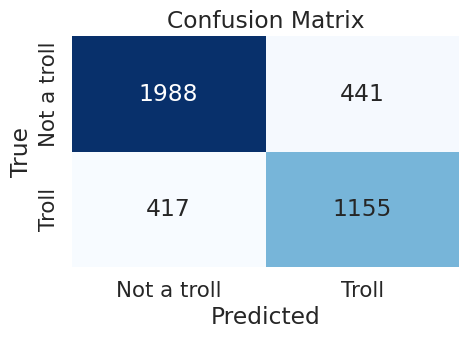

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
conf_matrix = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Not a troll', 'Troll'], yticklabels=['Not a troll', 'Troll'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [46]:
from sklearn.metrics import classification_report
y_pred_logits = model.predict(test_dataset.batch(32))
y_pred = tf.nn.softmax(y_pred_logits.logits, axis=-1)[:, 1]
y_pred_labels = [1 if prob >= 0.5 else 0 for prob in y_pred]
y_true = y_test
report = classification_report(y_true, y_pred_labels, target_names=['Not a troll', 'Troll'])

print(report)


126/126 [==============================] - 20s 159ms/step
              precision    recall  f1-score   support

 Not a troll       0.83      0.82      0.82      2429
       Troll       0.72      0.73      0.73      1572

    accuracy                           0.79      4001
   macro avg       0.78      0.78      0.78      4001
weighted avg       0.79      0.79      0.79      4001



In [31]:
model.save("my_distilbert_model")

In [32]:

new_texts = ["You really don't know how to put your view in a good way.", "Fucking nerd", " You Pathetic loser"]


new_texts_encoded = tokenizer(new_texts, truncation=True, padding=True, return_tensors='tf')


probabilities = model(new_texts_encoded)

troll_probabilities = probabilities.logits


binary_predictions = [1 if prob[0] >= 0.5 else 0 for prob in troll_probabilities]


for text, label in zip(new_texts, binary_predictions):
    if label == 0:
        print(f"Text: {text}\nLabel: Not a troll\n")
    else:
        print(f"Text: {text}\nLabel: Troll\n")


Text: You really don't know how to put your view in a good way.
Label: Troll

Text: Fucking nerd
Label: Not a troll

Text:  You Pathetic loser
Label: Not a troll

